In [27]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

import joblib


In [28]:
data = pd.read_csv("data/data.csv")
data.head()
data.describe()


,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,500000.500000,15.029127,84.711046,5.985203,84.283845
std,288675.278932,6.899431,9.424143,1.956421,15.432969
min,1.000000,0.000000,50.000000,0.000000,9.400000
25%,250000.750000,10.300000,78.300000,4.700000,73.900000
50%,500000.500000,15.000000,85.000000,6.000000,87.500000
75%,750000.250000,19.700000,91.800000,7.300000,100.000000
max,1000000.000000,40.000000,100.000000,10.000000,100.000000


In [29]:

X = data[['weekly_self_study_hours']]
y = data['total_score']


## Train-Test Split

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Model 1: Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

lr_r2 = r2_score(y_test, lr_pred)
lr_mae = mean_absolute_error(y_test, lr_pred)

print("Linear Regression R²:", lr_r2)
print("Linear Regression MAE:", lr_mae)


Linear Regression R²: 0.6600435613904075
Linear Regression MAE: 7.161324064837902


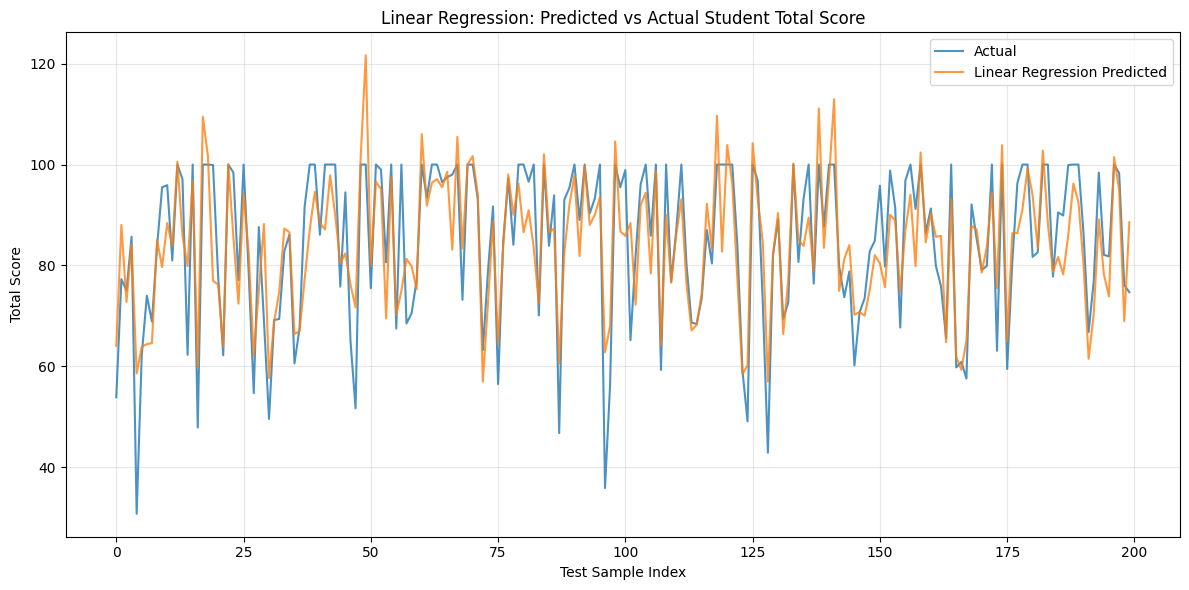

In [32]:
import matplotlib.pyplot as plt

# Compare actual vs Linear Regression predictions
n = min(200, len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:n], label="Actual", alpha=0.8)
plt.plot(lr_pred[:n], label="Linear Regression Predicted", alpha=0.8)
plt.legend()
plt.title("Linear Regression: Predicted vs Actual Student Total Score")
plt.xlabel("Test Sample Index")
plt.ylabel("Total Score")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
joblib.dump(lr_model, "model.pkl")

['model.pkl']